In [1]:
%matplotlib ipympl
# Activate auto reload 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from pymatgen.core import Structure
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from scipy.interpolate import griddata
from matplotlib import colors
from matplotlib import rcParams
from copy import copy
import nglview
from ase.build import bulk
from ase.visualize import view
from ase.geometry import cell_to_cellpar
from ase import Atoms
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pyccapt.calibration.reconstructions import sdm, rdf, fft

(2000, 3)


C:\Users\APTUser\.conda\envs\oxcart5\lib\site-packages\pymatgen\io\cif.py:1168: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


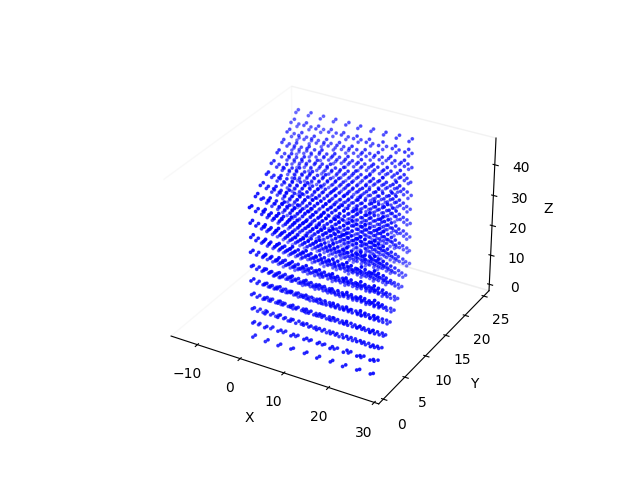

In [2]:
structure = Structure.from_file('Ti.cif')
structure.make_supercell(10)

coords = structure.cart_coords
noise = np.random.normal(loc=0.0, scale=0.05, size=(coords.shape))
coords = coords + noise
print(coords.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Plot atomic positions
ax.scatter(coords[:,0], coords[:,1], coords[:,2], c='b', marker='o', s=3)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

# Show the plot
plt.show()


(4000, 3)


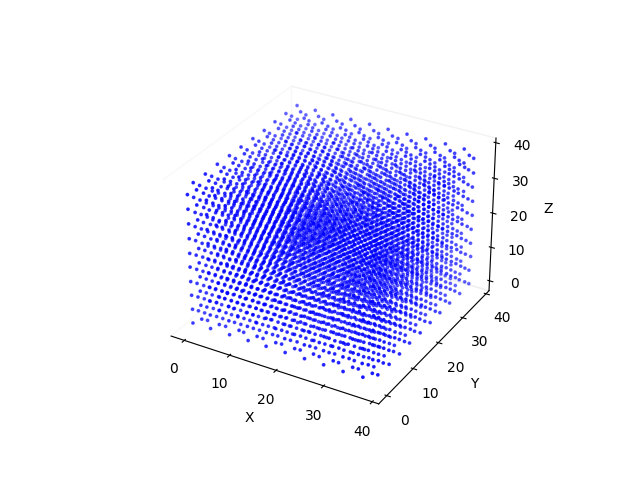

In [3]:
structure = Structure.from_file('Al.cif')
structure.make_supercell(10)

coords = structure.cart_coords
noise = np.random.normal(loc=0.0, scale=0.05, size=(coords.shape))
coords = coords + noise
print(coords.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Plot atomic positions
ax.scatter(coords[:,0], coords[:,1], coords[:,2], c='b', marker='o', s=3)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

# Show the plot
plt.show()


In [4]:
# Create an NGLView object
view_ngl = nglview.show_pymatgen(structure)

# Update atomic positions with noisy coordinates
# view.update_coordinates(coords)

# Display the structure
view_ngl.display()

NGLWidget()

The number of ions is:  4000


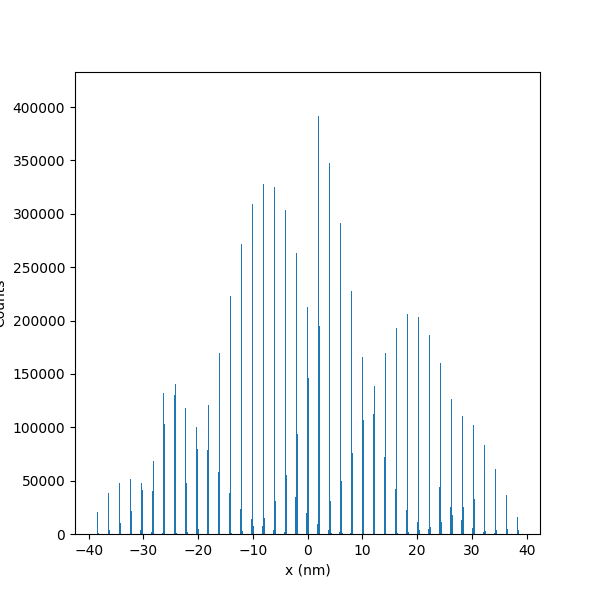

Cropping the data based on the reference point and box dimensions.
The number of ions is:  108


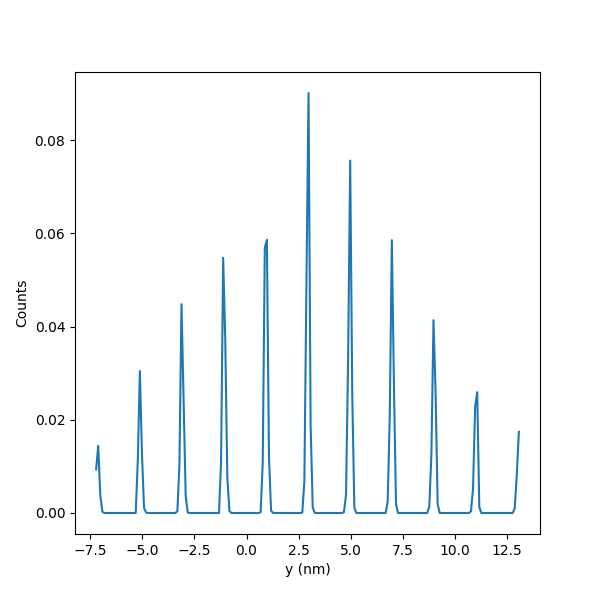

The number of ions is:  4000


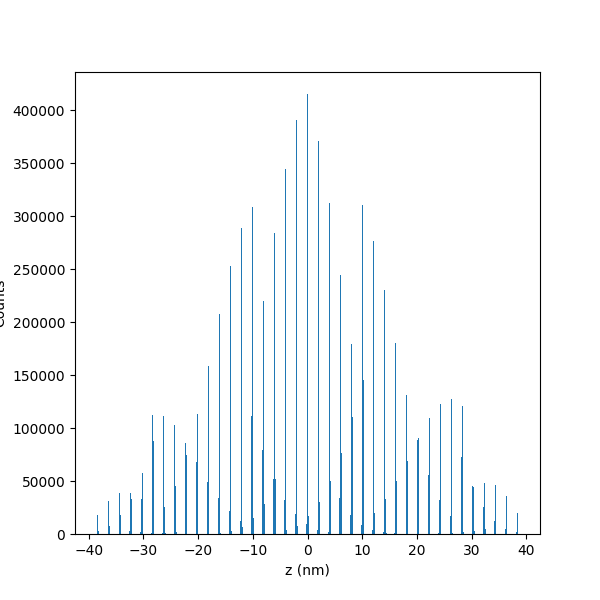

The number of ions is:  4000


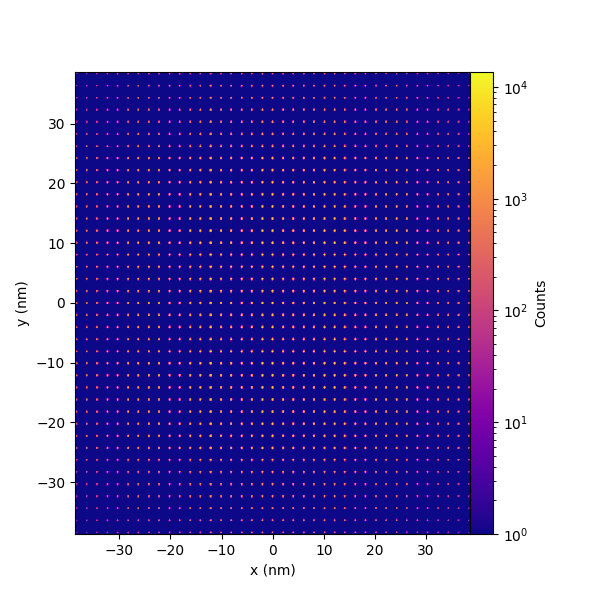

The number of ions is:  4000


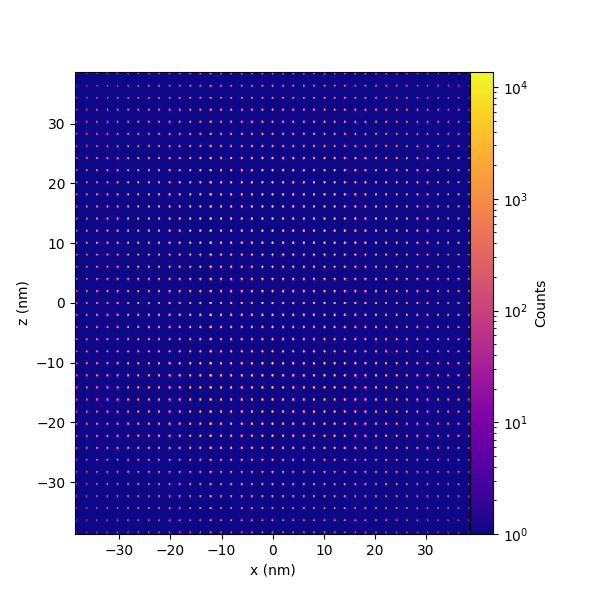

Cropping the data based on the reference point and box dimensions.
The number of ions is:  108


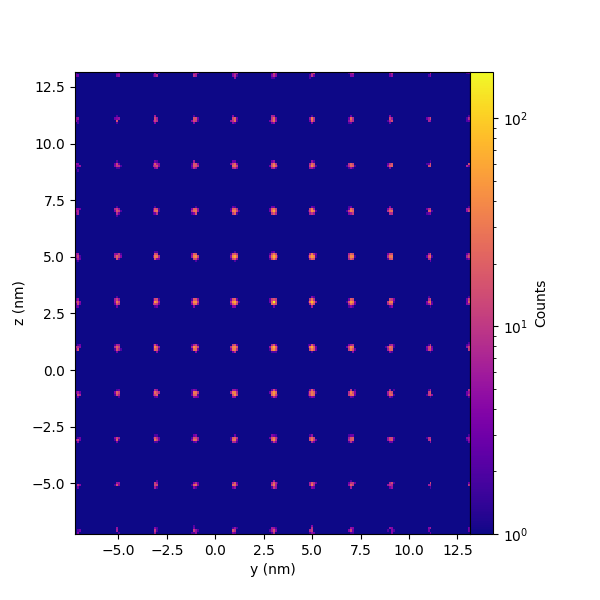

The number of ions is:  4000


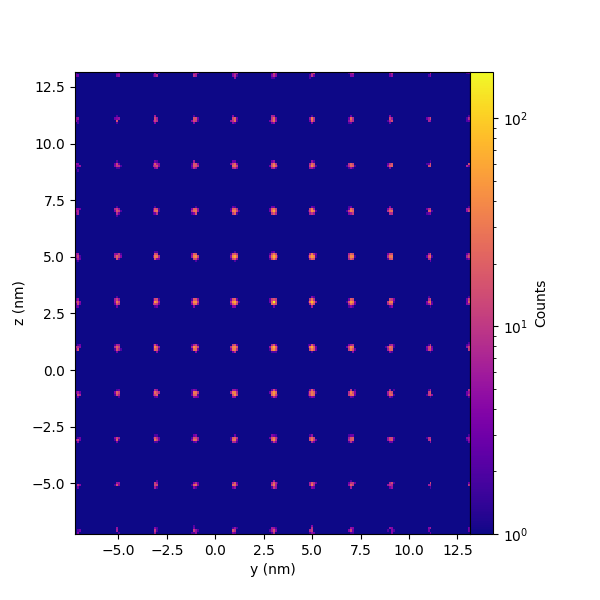

In [5]:
# compute spatial distribution map with dmax = 10 and nbins = 100
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, plot_mode='bar', plot=True,
                            histogram_type='1D', axes=['x'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=True, reference_point=[3,3,3],
                           reference_point_shift=True, box_dimensions=[15,15,15], plot_mode='line', plot=True,
                            histogram_type='1D', axes=['y'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, plot_mode='bar', plot=True,
                            histogram_type='1D', axes=['z'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, plot_mode='line', plot=True,
                            histogram_type='2D', axes=['x', 'y'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, plot=True,
                            histogram_type='2D', axes=['x', 'z'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, reference_point=[3,3,3],
                           reference_point_shift=True, box_dimensions=[15,15,15], plot_mode='line', plot=True,
                            histogram_type='2D', axes=['y', 'z'])

sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, reference_point=None,
                           reference_point_shift=False, box_dimensions=None, plot_mode='line', plot=True,
                            histogram_type='3D', axes=['x', 'y', 'z'])


The number of ions is:  2000


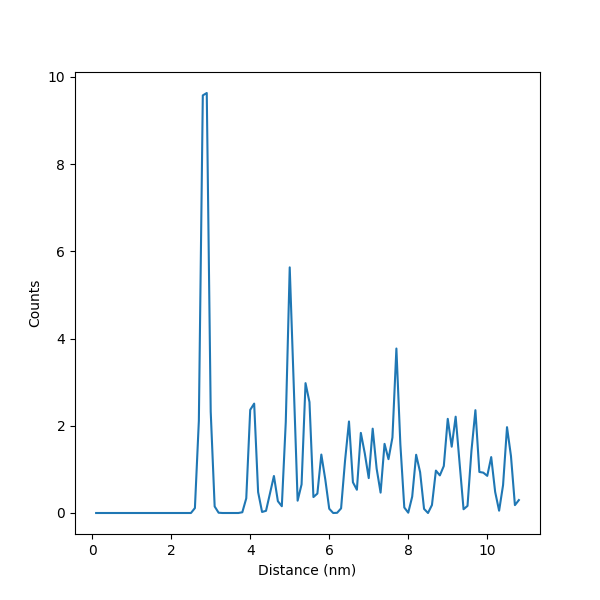

In [5]:
g_r, radii = rdf.rdf(coords, dr=0.1, variables=None, rho=None, rcutoff=0.9, eps=1e-15, normalize=True, reference_point=None,
        box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='rdf')

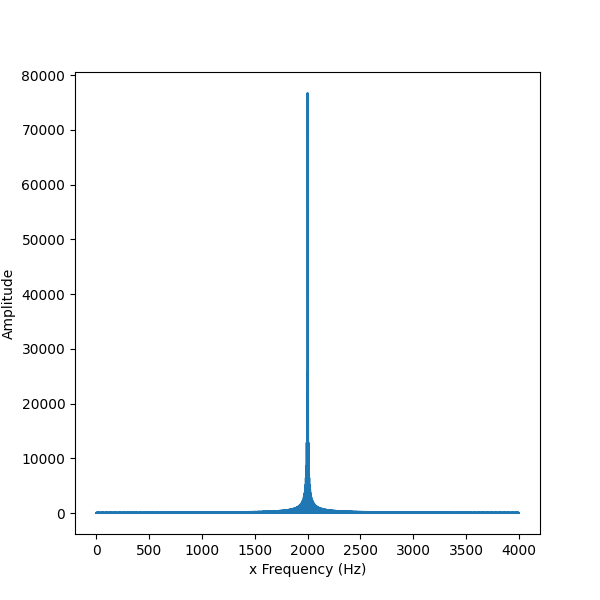

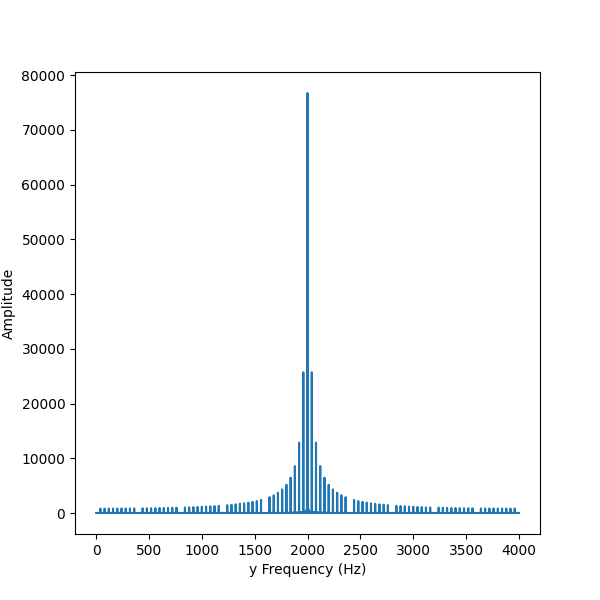

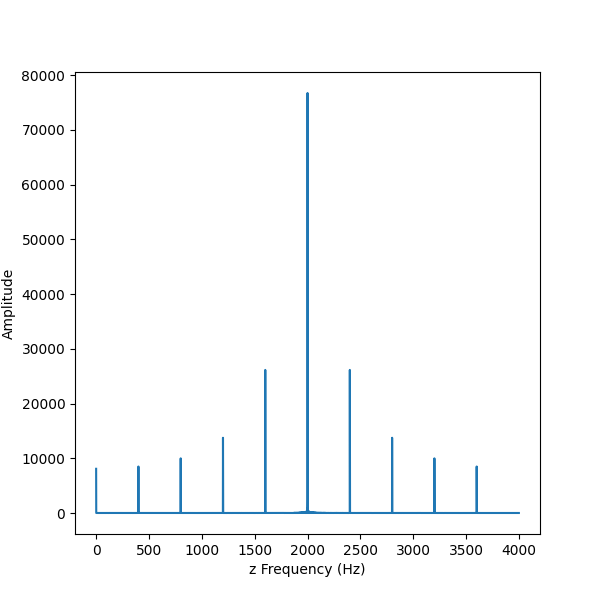

In [6]:
fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
        box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='1d', axes=['x'])
fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
        box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='1d', axes=['y'])
fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
        box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='1d', axes=['z'])
# fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
#         box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='2d', axes=['x','y'])
# fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
#         box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='2d', axes=['x','z'])
# fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
#         box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='2d', axes=['y','z'])
# fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
#         box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='3d', axes=['x','y','z'])

In [7]:

####################
# # Create the aluminum bulk crystal structure
# aluminum = bulk('Al', 'fcc', a=4.49580, b=4.49580, c=8.99160, alpha=90.0,  cubic=True)

# # Replicate the unit cell in x, y, and z directions to create a larger volume
# aluminum = aluminum.repeat((10, 10, 20))

# # Get the atomic positions
# positions = aluminum.get_positions()

# # Extract x, y, z coordinates from the positions
# x, y, z = positions[:, 0], positions[:, 1], positions[:, 2]

#################
# Create a small unit cell of aluminum
aluminum_unit_cell = bulk('Al', 'fcc', a=4.49580, b=4.49580, c=8.99160, alpha=90.0,  cubic=True)
view(aluminum_unit_cell, viewer='x3d', show_unit_cell=True)

# Calculate the dimensions of the supercell
supercell_dimensions = (5, 5, 10)
cell_parameters = cell_to_cellpar(aluminum_unit_cell.cell)
supercell_parameters = [dim * param for dim, param in zip(supercell_dimensions, cell_parameters)]

# Create a supercell
aluminum = Atoms(cell=supercell_parameters)
aluminum.extend(aluminum_unit_cell.repeat(supercell_dimensions))


# Get atomic positions
positions = aluminum.get_positions()

# Separate x, y, and z coordinates into arrays
x = positions[:, 0]
y = positions[:, 1]
z = positions[:, 2]


In [8]:
view(aluminum, viewer='ngl')